In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
!pip install --user -U imbalanced-learn
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer as count_vect
from sklearn.inspection import permutation_importance
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

Please install imbalanced learn in anaconda cmd

conda install -c conda-forge imbalanced-learn

## Directory Change

Import library os and change directory to compensate for multicore processing models



In [2]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))
path = 'F:\\bijan\\anaconda path'
os.chdir(path)
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\bijan\Python
Current working directory: F:\bijan\anaconda path


In [3]:
data = pd.read_csv(r'E:\Downloads\heart_2020_cleaned.csv\heart_2020_cleaned.csv')

## Data Exploration

Check dataset size and columns names

In [4]:
print(data.shape)
print(data.columns)

(319795, 18)
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


Check number of null and unique values

In [5]:
#checks number of null in variables
print(data.isnull().sum())
#checks number of unique values in variables 
print(data.nunique())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64


Check duplicates and drop

In [6]:
data.drop_duplicates(inplace= True)

data.shape


(301717, 18)

Check data description to find type of data stored and get more information

In [7]:
pd.set_option("display.max_columns", None)
print(data.describe(include = 'all'))

       HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        301717  301717.000000  301717          301717  301717   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         274456            NaN  174312          280136  289653   
mean            NaN      28.441970     NaN             NaN     NaN   
std             NaN       6.468134     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.410000     NaN             NaN     NaN   
75%             NaN      31.650000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count    301717.000000  301717.000000      301717  301717      301717  301717 

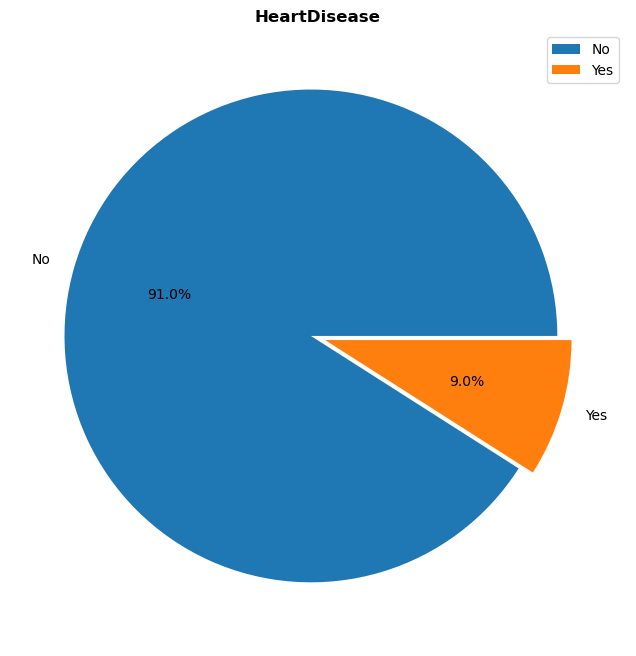

In [8]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(data['HeartDisease'].value_counts(),autopct='%1.1f%%',labels=['No',"Yes"],explode=[0.03 for i in data['HeartDisease'].value_counts().index])
ax.set_title('HeartDisease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1))
fig.show()

<AxesSubplot:xlabel='BMI', ylabel='Count'>

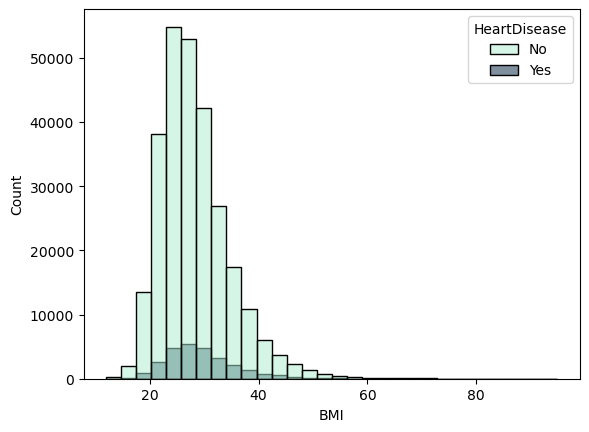

In [9]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.histplot(x = 'BMI',hue = 'HeartDisease', data = data, palette = palette, bins= 30)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

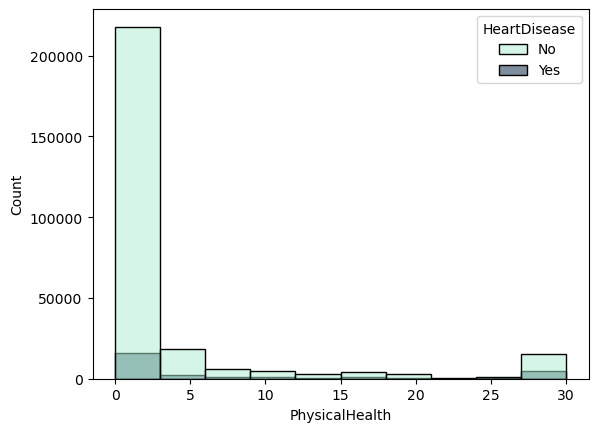

In [10]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.histplot(x = 'PhysicalHealth',hue = 'HeartDisease', data = data, palette = palette, bins = 10)

<AxesSubplot:xlabel='MentalHealth', ylabel='Count'>

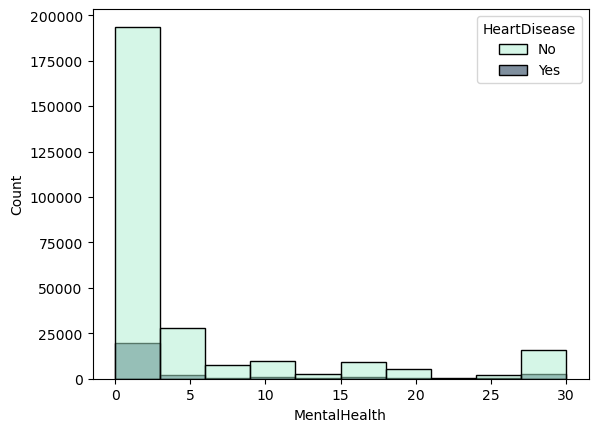

In [11]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.histplot(x = 'MentalHealth',hue = 'HeartDisease', data = data, palette = palette, bins = 10)

<AxesSubplot:xlabel='SleepTime', ylabel='Count'>

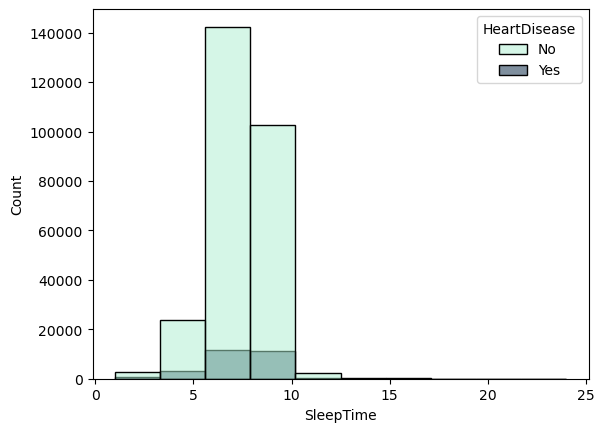

In [12]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.histplot(x = 'SleepTime',hue = 'HeartDisease', data = data, palette = palette, bins = 10)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

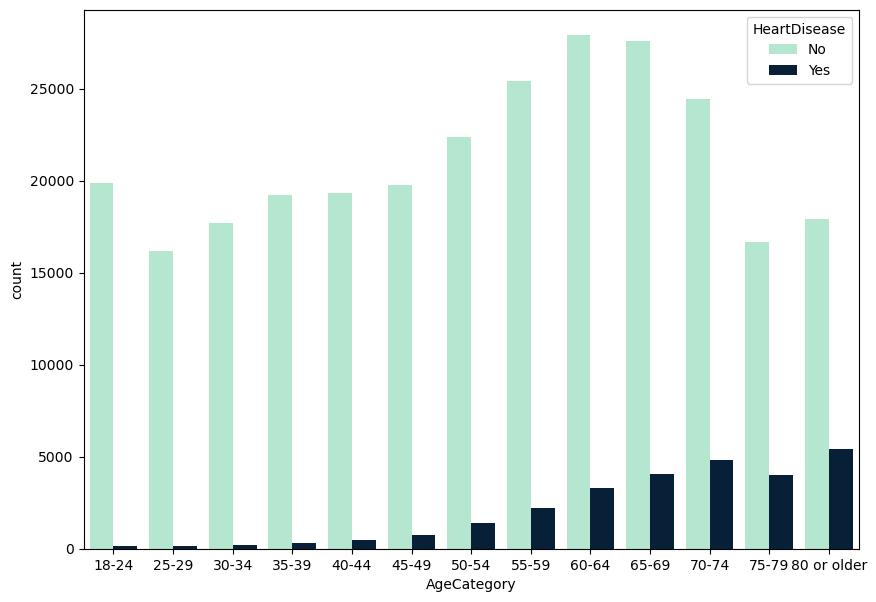

In [13]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
plt.figure(figsize=(10,7))
sns.countplot(x = 'AgeCategory',hue = 'HeartDisease', data = data, palette = palette, order=['18-24', '25-29', '30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'])

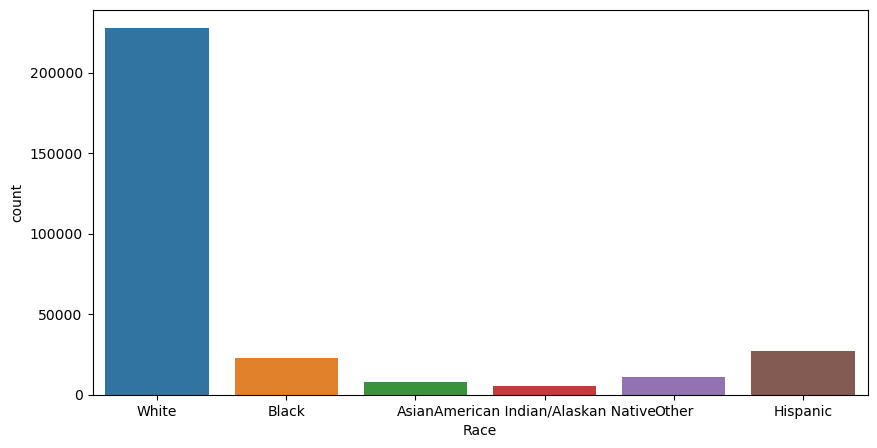

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='Race', data=data)
plt.show()

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

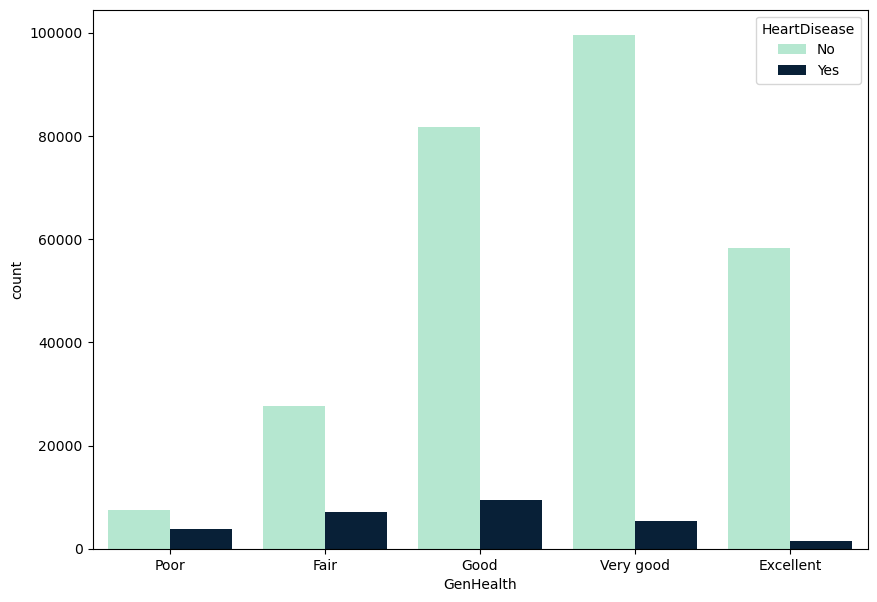

In [15]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
plt.figure(figsize=(10,7))
sns.countplot(x = 'GenHealth',hue = 'HeartDisease', data = data, palette = palette, order=['Poor','Fair','Good','Very good','Excellent'])

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

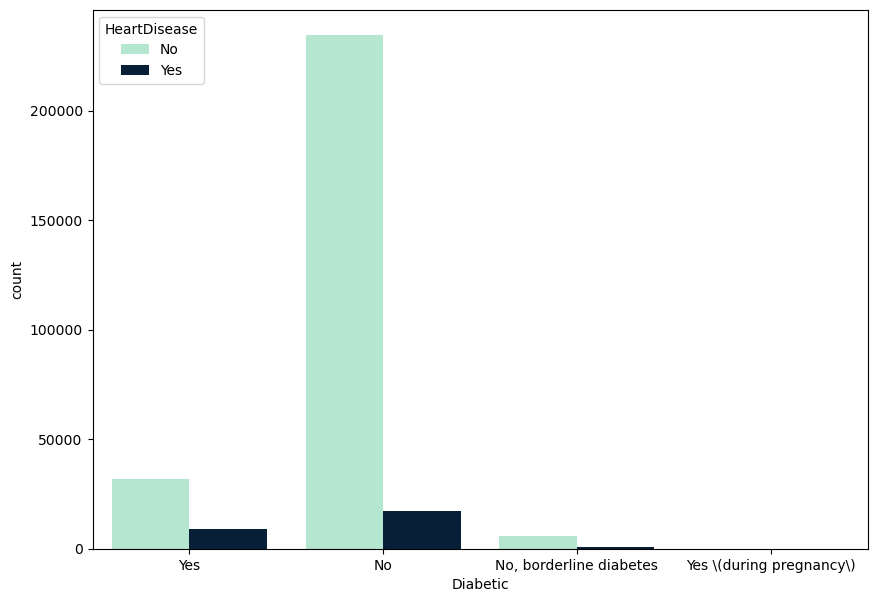

In [16]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
plt.figure(figsize=(10,7))
sns.countplot(x = 'Diabetic',hue = 'HeartDisease', data = data, palette = palette, order=['Yes', 'No' ,'No, borderline diabetes' ,'Yes \(during pregnancy\)'])

<AxesSubplot:xlabel='Smoking', ylabel='count'>

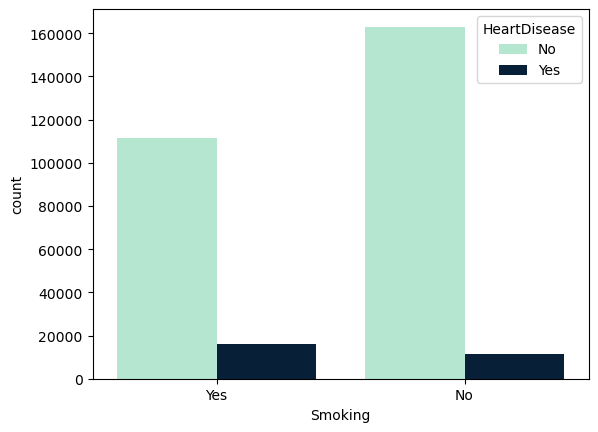

In [17]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'Smoking',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

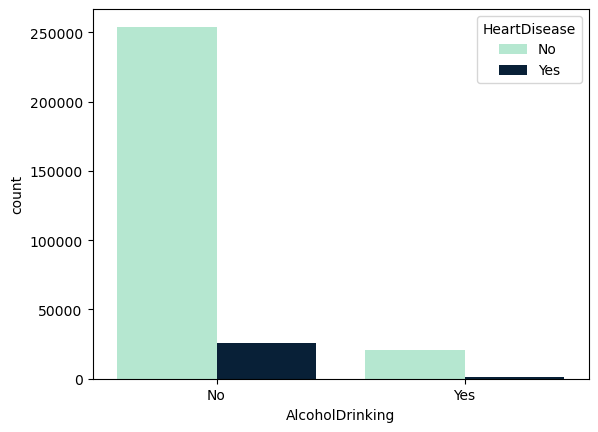

In [18]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'AlcoholDrinking',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='Stroke', ylabel='count'>

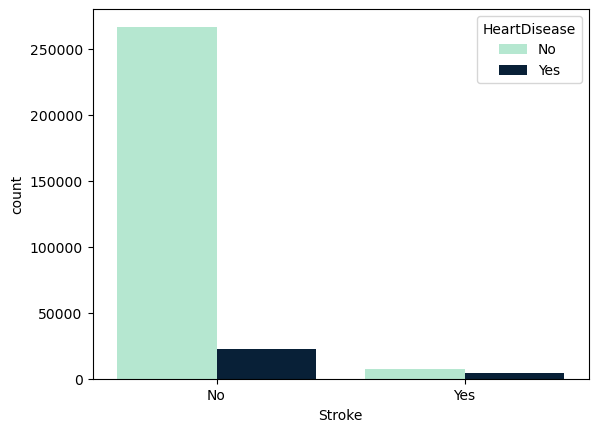

In [19]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'Stroke',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

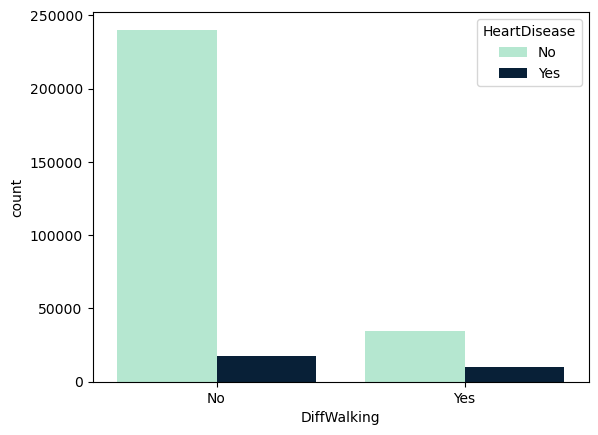

In [20]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'DiffWalking',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='Sex', ylabel='count'>

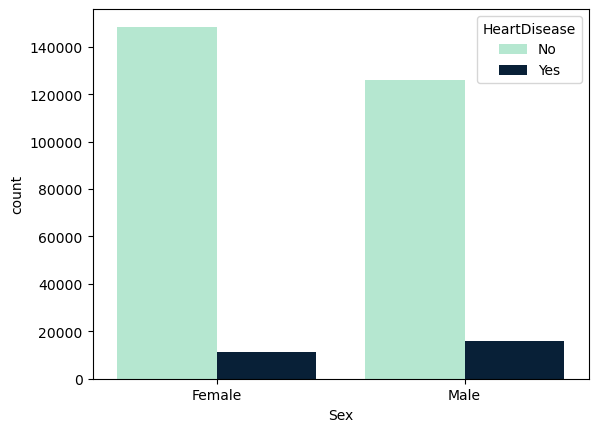

In [21]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'Sex',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

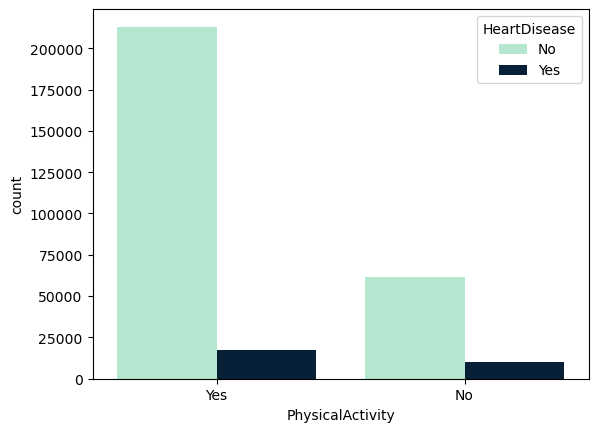

In [22]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'PhysicalActivity',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='Asthma', ylabel='count'>

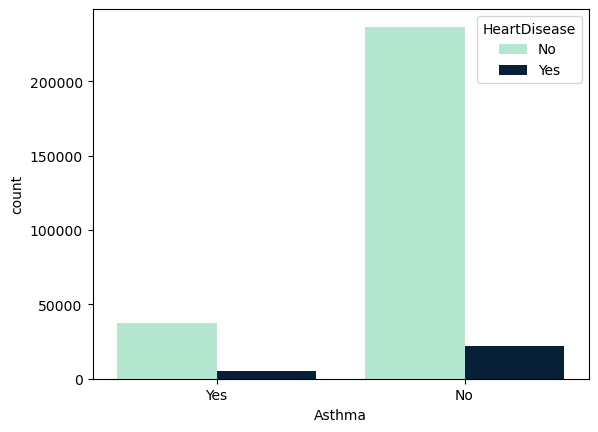

In [23]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'Asthma',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

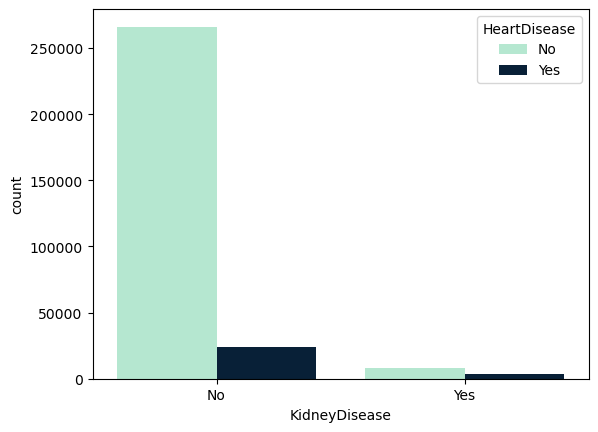

In [24]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'KidneyDisease',hue = 'HeartDisease', data = data, palette = palette)

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

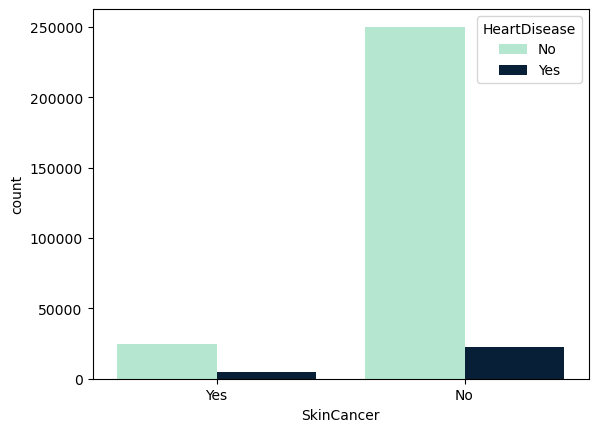

In [25]:
palette = {'No':"#ADEFD1FF",
            'Yes':"#00203FFF" }
sns.countplot(x = 'SkinCancer',hue = 'HeartDisease', data = data, palette = palette)

## Data Preprocessing


Lets check for outliers

<AxesSubplot:xlabel='BMI'>

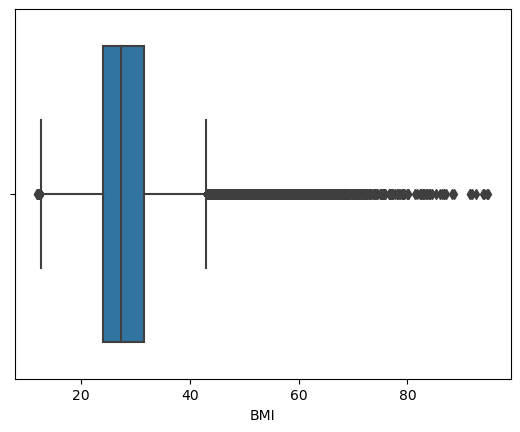

In [26]:
sns.boxplot(x=data['BMI'])

In [27]:
print(data['BMI'].quantile(.001))
print(data['BMI'].quantile(.999))

low = data['BMI'].quantile(.001)
high = data['BMI'].quantile(.999)

print(np.sum(data.loc[:, 'BMI'] < low))
print(np.sum(data.loc[:, 'BMI'] > high))

outlier_s = (data['BMI'] > high) | (data['BMI'] < low)
data['BMI'] = data['BMI'].where(~outlier_s,np.nan)
data['BMI'].isna().sum()

15.04
63.27
301
301


602

In [28]:
print(data['SleepTime'].quantile(.01))
print(data['SleepTime'].quantile(.999))

low = data['SleepTime'].quantile(.01)
high = data['SleepTime'].quantile(.999)

print(np.sum(data.loc[:, 'SleepTime'] < low))
print(np.sum(data.loc[:, 'SleepTime'] > high))

outlier_s = (data['SleepTime'] > high) | (data['SleepTime'] < low)
data['SleepTime'] = data['SleepTime'].where(~outlier_s,np.nan)
data['SleepTime'].isna().sum()

3.0
16.0
1339
234


1573

Check to see which variables are binary so we can make them numerical for the models

In [29]:
#Create array with columns with only 2 unique values for label encoding

cols = []

columns = list(data)
 
for i in columns:
    if data[i].nunique() <= 2:
        cols += [i]
print(cols)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [30]:
from sklearn.preprocessing import LabelEncoder

#Label encode ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
le = LabelEncoder()
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

Now we check the unique variables in the remaining categorical variables

In [31]:
print(data['AgeCategory'].unique())
print(data['Diabetic'].unique())
print(data['GenHealth'].unique())
print(data['Race'].unique())
print(data.Diabetic.value_counts())

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64


Now we remove special character - in age category  so it can be changed to numerical using hot encoding ordering it by year. We will also do the same for Gen health ordering by poor to excellent


In [32]:
data['AgeCategory'] = data['AgeCategory'].str.replace('\W', '', regex=True)

from sklearn.preprocessing import OrdinalEncoder


Age = ['1824', '2529', '3034','3539','4044','4549','5054','5559','6064','6569','7074','7579','80orolder']
encAge = OrdinalEncoder(categories = [Age])
data[['AgeCategory']] = encAge.fit_transform(data[['AgeCategory']])


Gen = ['Poor','Fair','Good','Very good', 'Excellent']
encGen = OrdinalEncoder(categories = [Gen])
data[['GenHealth']] = encGen.fit_transform(data[['GenHealth']])

Now instead of hot encoding diabetic we will make a new column where yes (during pregnany) becomes a binary variable

In [33]:
conditions = [(~data['Diabetic'].str.contains('Yes \(during pregnancy\)')), (data['Diabetic'].str.contains('Yes \(during pregnancy\)'))]
values = [0,1]
data['PregDiabetic'] = np.select(conditions,values)
print(data.PregDiabetic.value_counts())

0    299161
1      2556
Name: PregDiabetic, dtype: int64


Now we change all yes (during pregnancy) to yes so we can ordinal encode diabetic now

In [34]:
data['Diabetic'] = data['Diabetic'].str.replace('Yes \(during pregnancy\)', 'Yes', regex=True)

In [35]:
Deb = ['No','No, borderline diabetes','Yes']
encDeb = OrdinalEncoder(categories = [Deb])
data[['Diabetic']] = encDeb.fit_transform(data[['Diabetic']])


In [36]:
print(data['Diabetic'].unique())
print(data['PregDiabetic'].unique())

[2. 0. 1.]
[0 1]


The final encoding will be a one hot encode for race 

In [37]:
finalData = pd.get_dummies(data=data, columns=['Race'], prefix='', prefix_sep='')

In [38]:
print(finalData.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'PregDiabetic',
       'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
       'White'],
      dtype='object')


In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
imp = IterativeImputer(estimator =lr,  random_state=0)
finalData =pd.DataFrame(imp.fit_transform(finalData),columns = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'PregDiabetic', 'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White'])

Scale all columns to 0 to 1

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
finalData[["BMI"]] = scaler.fit_transform(finalData[["BMI"]])
finalData[["SleepTime"]] = scaler.fit_transform(finalData[["SleepTime"]])
finalData[["PhysicalHealth"]] = scaler.fit_transform(finalData[["PhysicalHealth"]])
finalData[["MentalHealth"]] = scaler.fit_transform(finalData[["MentalHealth"]])
finalData[["AgeCategory"]] = scaler.fit_transform(finalData[["AgeCategory"]])
finalData[["Diabetic"]] = scaler.fit_transform(finalData[["Diabetic"]])
finalData[["GenHealth"]] = scaler.fit_transform(finalData[["GenHealth"]])

Lets take a look at what the data looks like now

In [41]:
print(finalData.head)
finalData.dtypes

<bound method NDFrame.head of         HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                0.0  0.032345      1.0              0.0     0.0   
1                0.0  0.109890      0.0              0.0     1.0   
2                0.0  0.239270      1.0              0.0     0.0   
3                0.0  0.190131      0.0              0.0     0.0   
4                0.0  0.179764      0.0              0.0     0.0   
...              ...       ...      ...              ...     ...   
301712           1.0  0.256479      1.0              0.0     0.0   
301713           0.0  0.306863      1.0              0.0     0.0   
301714           0.0  0.190753      0.0              0.0     0.0   
301715           0.0  0.368443      0.0              0.0     0.0   
301716           0.0  0.653535      0.0              0.0     0.0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
0             0.100000           1.0          0.0  0.0     0.583333     

HeartDisease                      float64
BMI                               float64
Smoking                           float64
AlcoholDrinking                   float64
Stroke                            float64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                       float64
Sex                               float64
AgeCategory                       float64
Diabetic                          float64
PhysicalActivity                  float64
GenHealth                         float64
SleepTime                         float64
Asthma                            float64
KidneyDisease                     float64
SkinCancer                        float64
PregDiabetic                      float64
American Indian/Alaskan Native    float64
Asian                             float64
Black                             float64
Hispanic                          float64
Other                             float64
White                             

In [42]:
finalData.isna().sum()

HeartDisease                      0
BMI                               0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
PhysicalHealth                    0
MentalHealth                      0
DiffWalking                       0
Sex                               0
AgeCategory                       0
Diabetic                          0
PhysicalActivity                  0
GenHealth                         0
SleepTime                         0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
PregDiabetic                      0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
dtype: int64

The data takes alot of space so we will down size the type of data each variable is to save space and processing power

In [48]:
finalData.loc[:, ~finalData.columns.isin(['BMI','SleepTime',"PhysicalHealth","MentalHealth",'AgeCategory',"Diabetic","GenHealth"])] = finalData.loc[:, ~finalData.columns.isin(['BMI','SleepTime'])].astype('int8')
finalData['BMI'] = finalData['BMI'].astype('float32')
finalData['SleepTime'] = finalData['SleepTime'].astype('float32')
finalData["PhysicalHealth"] = finalData["PhysicalHealth"].astype('float32')
finalData["MentalHealth"] = finalData["MentalHealth"].astype('float32')
finalData['AgeCategory'] = finalData['AgeCategory'].astype('float32')
finalData["Diabetic"] = finalData["Diabetic"].astype('float32')
finalData["GenHealth"] = finalData["GenHealth"].astype('float32')
finalData.dtypes

HeartDisease                         int8
BMI                               float32
Smoking                              int8
AlcoholDrinking                      int8
Stroke                               int8
PhysicalHealth                    float32
MentalHealth                      float32
DiffWalking                          int8
Sex                                  int8
AgeCategory                       float32
Diabetic                          float32
PhysicalActivity                     int8
GenHealth                         float32
SleepTime                         float32
Asthma                               int8
KidneyDisease                        int8
SkinCancer                           int8
PregDiabetic                         int8
American Indian/Alaskan Native       int8
Asian                                int8
Black                                int8
Hispanic                             int8
Other                                int8
White                             

This is the correlation of all binary variables to target variable

In [44]:
cor = finalData.corr()
cor_target = abs(cor["HeartDisease"])

relevant_features = cor_target[cols].sort_values()
relevant_features

Asthma              0.035784
AlcoholDrinking     0.036289
Sex                 0.074435
SkinCancer          0.090644
PhysicalActivity    0.093597
Smoking             0.104524
KidneyDisease       0.142672
Stroke              0.194665
DiffWalking         0.196420
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

## Modeling

Time to split the data

In [49]:
from sklearn.model_selection import train_test_split
y = finalData['HeartDisease']
X = finalData.loc[:, finalData.columns != 'HeartDisease']

In [50]:

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.3)
X_over, y_over = oversample.fit_resample(X, y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state=42)
print(np.mean(y_train), np.mean(y),np.mean(y_test))

0.2311194215107666 0.0903528803481408 0.22994637418486893


### SVM
First model we will be running is linear SVM

In [52]:
from sklearn.svm import LinearSVC

In [53]:
from sklearn.svm import LinearSVC

lr_svc = LinearSVC(random_state = 0) 
lr_svc.fit(X_train, y_train)

LinearSVC(random_state=0)

This is the test score for SVM

In [54]:
lr_svc.score(X_test, y_test)

0.8101795623984006

Building SVM confusion matrix, ROC and AUC

In [55]:
y_pred_svc = lr_svc.predict(X_test)

In [56]:
my_matrix = (confusion_matrix(y_test, y_pred_svc))

In [57]:
my_matrix

array([[77941,  4484],
       [15834,  8779]], dtype=int64)

In [58]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 8779
TN is: 77941
FP is: 4484
FN is: 15834


In [59]:
print('Precision score:', precision_score(y_test, y_pred_svc))
print('Recall score:', recall_score(y_test, y_pred_svc))
print('Accuracy score:', accuracy_score(y_test, y_pred_svc))
print('F1 score:', f1_score(y_test, y_pred_svc))

Precision score: 0.6619166101183744
Recall score: 0.35668142851338724
Accuracy score: 0.8101795623984006
F1 score: 0.46356531840743476


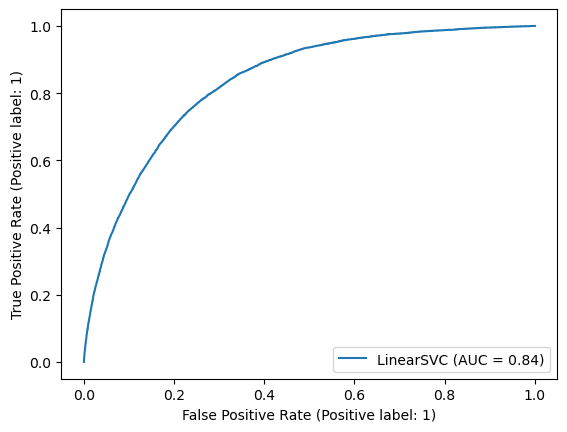

In [60]:
svc_disp = RocCurveDisplay.from_estimator(lr_svc, X_test, y_test)

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_params =  {'penalty' : ['l1', 'l2'],}

grid_log = LogisticRegression(solver = 'liblinear',max_iter = 2000, random_state = 0)

grid_log = GridSearchCV(grid_log, log_params, n_jobs = -1, cv=5)

grid_log.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=2000, random_state=0,
                                          solver='liblinear'),
             n_jobs=-1, param_grid={'penalty': ['l1', 'l2']})

Now we print the best parameters and test score

In [62]:
print('Best Params', grid_log.best_params_)
print('Score', grid_log.score(X_test, y_test))

Best Params {'penalty': 'l1'}
Score 0.8102636446869336


Feature importance of logistic regession

In [63]:
coef = grid_log.best_estimator_.coef_

In [64]:
coef_list = []
for i in coef:
    coef_list.extend(i)
feature_imp_log = pd.DataFrame(X_train.columns)
feature_imp_log['coefficients'] = coef_list
feature_imp_log = feature_imp_log.rename(columns={0: "Columns"})
feature_imp_log = feature_imp_log.sort_values(by = ['coefficients'])
feature_imp_log

,Columns,coefficients
11,GenHealth,-1.946554
18,Asian,-1.927186
19,Black,-1.682313
20,Hispanic,-1.589663
22,White,-1.390272
21,Other,-1.376115
17,American Indian/Alaskan Native,-1.289637
16,PregDiabetic,-0.396550
12,SleepTime,-0.393931
2,AlcoholDrinking,-0.308991


Building logistic regression confusion matrix, ROC and AUC

In [65]:
y_pred_log = grid_log.best_estimator_.predict(X_test)

In [66]:
my_matrix = (confusion_matrix(y_test, y_pred_log))

In [67]:
my_matrix

array([[77069,  5356],
       [14953,  9660]], dtype=int64)

In [68]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 9660
TN is: 77069
FP is: 5356
FN is: 14953


In [69]:
print('Precision score:', precision_score(y_test, y_pred_log))
print('Recall score:', recall_score(y_test, y_pred_log))
print('Accuracy score:', accuracy_score(y_test, y_pred_log))
print('F1 score:', f1_score(y_test, y_pred_log))

Precision score: 0.6433137986148109
Recall score: 0.3924755210661033
Accuracy score: 0.8102636446869336
F1 score: 0.48752176436448064


Text(0, 0.5, 'Precision')

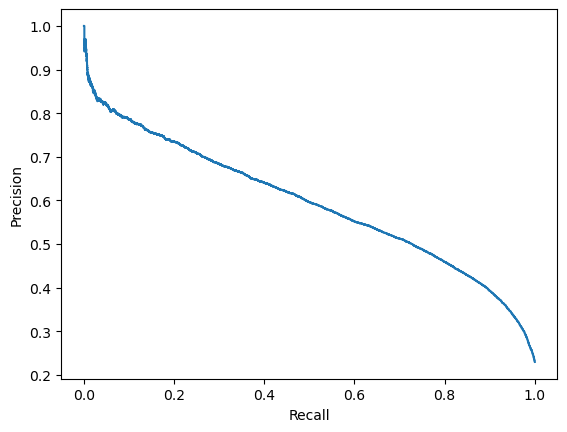

In [70]:
#Generating ROC and AUC curves
#AUC Curve
my_prob = grid_log.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, my_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

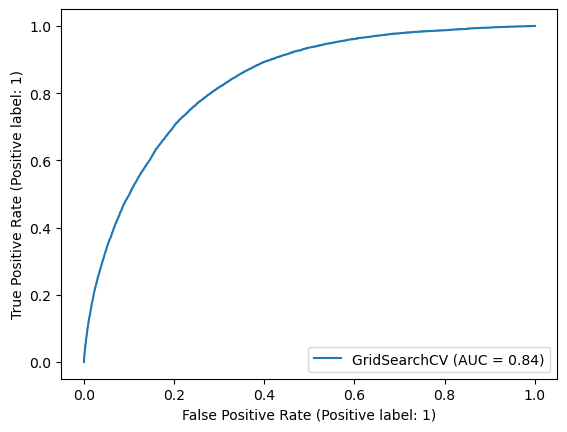

In [71]:
grid_log_disp = RocCurveDisplay.from_estimator(grid_log, X_test, y_test)

### Random Forest

In [72]:
from sklearn.model_selection import GridSearchCV

rf_params =  {'max_depth' : [20,25,30],
           'min_samples_split': [2,3,4]}

rf_grid = RandomForestClassifier(n_estimators = 500, max_samples = 60000, 
                                bootstrap = True, random_state = 0,n_jobs=-1,)

grid_rf = GridSearchCV(rf_grid, rf_params, n_jobs = -1)

grid_rf.fit(X_train,y_train)


GridSearchCV(estimator=RandomForestClassifier(max_samples=60000,
                                              n_estimators=500, n_jobs=-1,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_split': [2, 3, 4]})

Now we print the best parameters and test score

In [73]:
print('Best Params', grid_rf.best_params_)
print('Score', grid_rf.score(X_test, y_test))

Best Params {'max_depth': 30, 'min_samples_split': 2}
Score 0.8837141949587997


Feature importance of Random Forest

In [74]:
grid_rf.best_estimator_.feature_importances_

array([0.25786638, 0.02125543, 0.00950542, 0.03329516, 0.07269282,
       0.06127076, 0.03365978, 0.02710012, 0.15568472, 0.03401801,
       0.02292667, 0.08377354, 0.09590211, 0.01919242, 0.01654476,
       0.01631068, 0.00149409, 0.00381647, 0.00248147, 0.00734394,
       0.00665606, 0.00533349, 0.01187571])

<BarContainer object of 23 artists>

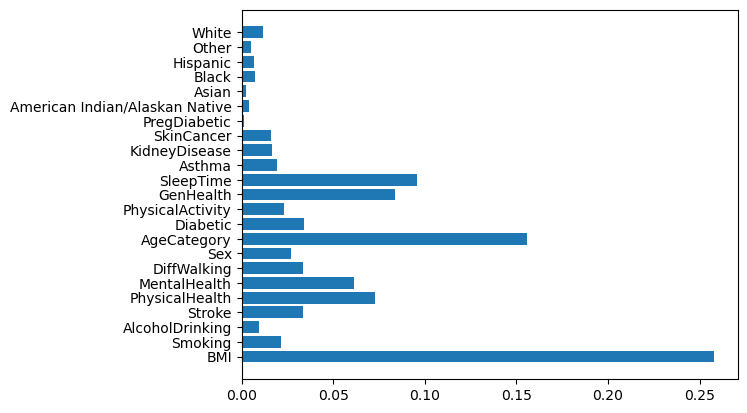

In [75]:
plt.barh(X_train.columns, grid_rf.best_estimator_.feature_importances_)

Building random forest confusion matrix, ROC and AUC

In [76]:
y_pred_forest = grid_rf.predict(X_test)

In [77]:
my_matrix = (confusion_matrix(y_test, y_pred_forest))

In [78]:
my_matrix

array([[77477,  4948],
       [ 7499, 17114]], dtype=int64)

In [79]:
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 17114
TN is: 77477
FP is: 4948
FN is: 7499


In [80]:
print('Precision score:', precision_score(y_test, y_pred_forest))
print('Recall score:', recall_score(y_test, y_pred_forest))
print('Accuracy score:', accuracy_score(y_test, y_pred_forest))
print('F1 score:', f1_score(y_test, y_pred_forest))

Precision score: 0.775722962560058
Recall score: 0.6953236094746679
Accuracy score: 0.8837141949587997
F1 score: 0.7333261917514728


Text(0, 0.5, 'Precision')

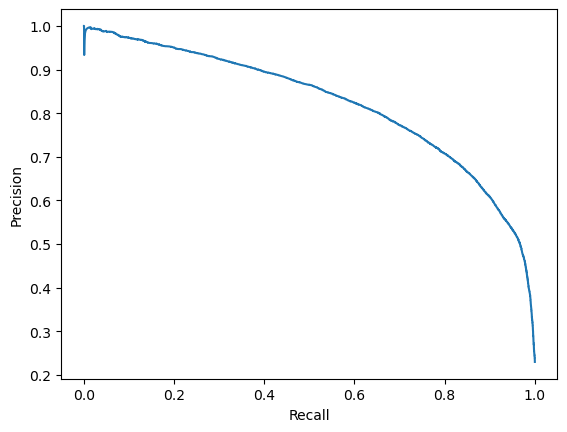

In [81]:
#ROC and AUC Curves
#Generating ROC and AUC curves
#AUC Curve
my_prob_forest = grid_rf.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, my_prob_forest)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

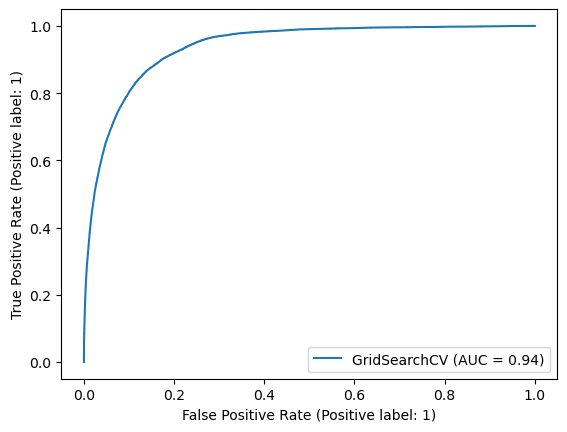

In [82]:
rfclf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test)

## SVM Kernel

In [122]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

base_k = SVC(random_state= 0, kernel = 'rbf', C = 10 , gamma = 1)

bag_clf = BaggingClassifier(base_k, n_estimators = 100, max_samples = 20000, random_state = 0, bootstrap = True, n_jobs = -1)

bag_clf.fit(X_train,y_train)



BaggingClassifier(base_estimator=SVC(C=10, gamma=1, random_state=0),
                  max_samples=20000, n_estimators=100, n_jobs=-1,
                  random_state=0)

In [123]:
bag_clf.score(X_test, y_test)

0.8152618696163979

In [124]:
y_pred_bag = bag_clf.predict(X_test)
my_matrix = (confusion_matrix(y_test, y_pred_bag))
my_matrix
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 9856
TN is: 77408
FP is: 5017
FN is: 14757


In [125]:
print('Precision score:', precision_score(y_test, y_pred_bag))
print('Recall score:', recall_score(y_test, y_pred_bag))
print('Accuracy score:', accuracy_score(y_test, y_pred_bag))
print('F1 score:', f1_score(y_test, y_pred_bag))

Precision score: 0.6626773347676999
Recall score: 0.4004387925080242
Accuracy score: 0.8152618696163979
F1 score: 0.499214911614243


Text(0, 0.5, 'Precision')

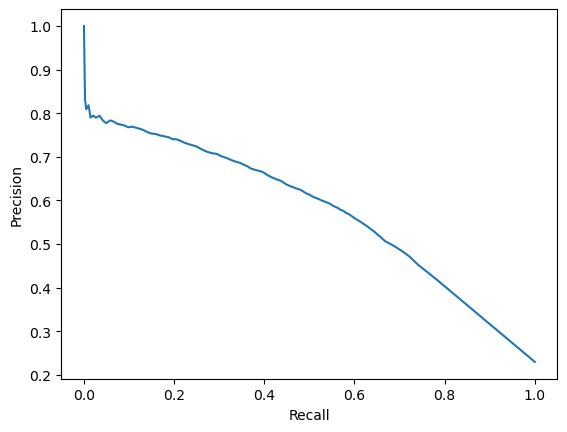

In [126]:
#ROC and AUC Curves
#Generating ROC and AUC curves
#AUC Curve
my_prob_bag = bag_clf.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, my_prob_bag)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

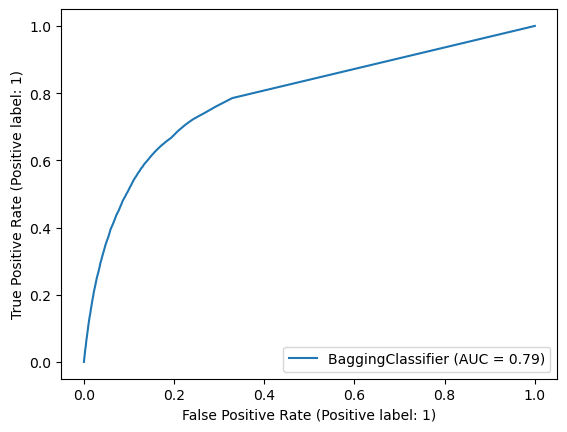

In [127]:
rfclf_disp = RocCurveDisplay.from_estimator(bag_clf, X_test, y_test)

### Voting Classifier


In [128]:
from sklearn.ensemble import VotingClassifier

base_k2 = SVC(random_state= 0, kernel = 'rbf',C = 10, gamma= 1)

log_vot = LogisticRegression(solver = 'liblinear',max_iter = 2000, random_state = 0, penalty = 'l2',n_jobs = -1)
rf_vot = RandomForestClassifier(n_estimators = 500, max_samples = 60000, bootstrap = True, random_state = 0,n_jobs=-1,max_depth = 25, min_samples_split = 3)


voting_clf = VotingClassifier(
    estimators=[('log', log_vot), ('ker', bag_clf), ('rf', rf_vot)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(max_iter=2000, n_jobs=-1,
                                                 random_state=0,
                                                 solver='liblinear')),
                             ('ker',
                              BaggingClassifier(base_estimator=SVC(C=10,
                                                                   gamma=1,
                                                                   random_state=0),
                                                max_samples=20000,
                                                n_estimators=100, n_jobs=-1,
                                                random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=25,
                                                     max_samples=60000,
                                                     min_samples_split=3,
                                                     n_estimators=500,
                                                     n_jobs=-1,
                                                     random_state=0))])

Now we run the matrix and performance measures for voting classifier

In [129]:
y_pred_vot = voting_clf.predict(X_test)
my_matrix = (confusion_matrix(y_test, y_pred_vot))
my_matrix
print("TP is:", my_matrix[1, 1])
print("TN is:", my_matrix[0, 0])
print("FP is:", my_matrix[0, 1])
print("FN is:", my_matrix[1, 0])

TP is: 10661
TN is: 77814
FP is: 4611
FN is: 13952


In [130]:
print('Precision score:', precision_score(y_test, y_pred_vot))
print('Recall score:', recall_score(y_test, y_pred_vot))
print('Accuracy score:', accuracy_score(y_test, y_pred_vot))
print('F1 score:', f1_score(y_test, y_pred_vot))

Precision score: 0.698074908328968
Recall score: 0.4331450859301995
Accuracy score: 0.8265756086623443
F1 score: 0.5345869374451547


### Final Test Scores

In [131]:
print('Logistic Regression Accuracy Score', grid_log.score(X_test, y_test))
print('Logistic Regression F1 score:', f1_score(y_test, y_pred_log))
print('Random Forest Accuracy Score', grid_rf.score(X_test, y_test))
print('Random Forest F1 score:', f1_score(y_test, y_pred_forest))
print('SVM Kernel Accuracy Score',bag_clf.score(X_test, y_test))
print('SVM F1 score:', f1_score(y_test, y_pred_bag))
print('Voting Classifier Accuracy Score', voting_clf.score(X_test, y_test))
print('Voting Classifier F1 score:', f1_score(y_test, y_pred_vot))

Logistic Regression Accuracy Score 0.8102636446869336
Logistic Regression F1 score: 0.48752176436448064
Random Forest Accuracy Score 0.8837141949587997
Random Forest F1 score: 0.7333261917514728
SVM Kernel Accuracy Score 0.8152618696163979
SVM F1 score: 0.499214911614243
Voting Classifier Accuracy Score 0.8265756086623443
Voting Classifier F1 score: 0.5345869374451547
